ETHUSD
LTCUSD
BTCUSD


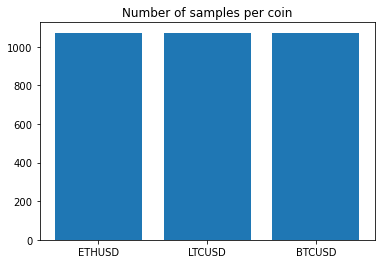

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

df = pd.read_excel('btc_eth_ltc.xlsx', index_col=1)

df = df.sort_values('Date')
df

df['Symbol'].unique()

df.groupby('Symbol')['Unix Timestamp'].nunique()

plt.title('Number of samples per coin')
plt.bar(df['Symbol'].unique(),df.groupby('Symbol')['Unix Timestamp'].nunique())

#Split dataframes
list_df = {}
for name in df['Symbol'].unique():
    print(name)
    list_df.update({name:df[df.Symbol==name]})

ltc_df = list_df.get('LTCUSD')
btc_df = list_df.get('BTCUSD')
eth_df = list_df.get('ETHUSD')


ltc_df

# ltc_df['Close'].plot()

prophet_df=pd.DataFrame()
prophet_df['y'] = ltc_df['Close']
prophet_df['ds'] = ltc_df.index
prophet_df.reset_index(drop=True, inplace=True)

In [2]:
prophet_df

,y,ds
0,52.92,2018-10-16 04:00:00
1,53.52,2018-10-17 04:00:00
2,51.88,2018-10-18 04:00:00
3,51.88,2018-10-19 04:00:00
4,52.75,2018-10-20 04:00:00
...,...,...
1068,179.44,2021-09-18 04:00:00
1069,167.01,2021-09-19 04:00:00
1070,159.47,2021-09-20 04:00:00
1071,151.48,2021-09-21 04:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

df = pd.read_excel('btc_eth_ltc.xlsx', index_col=1)

df = df.sort_values('Date')
df

df['Symbol'].unique()

df.groupby('Symbol')['Unix Timestamp'].nunique()

plt.title('Number of samples per coin')
plt.bar(df['Symbol'].unique(),df.groupby('Symbol')['Unix Timestamp'].nunique())

#Split dataframes
list_df = {}
for name in df['Symbol'].unique():
    print(name)
    list_df.update({name:df[df.Symbol==name]})

ltc_df = list_df.get('LTCUSD')
btc_df = list_df.get('BTCUSD')
eth_df = list_df.get('ETHUSD')


ltc_df

# ltc_df['Close'].plot()

prophet_df=pd.DataFrame()
prophet_df['y'] = ltc_df['Close']
prophet_df['ds'] = ltc_df.index
prophet_df.reset_index(drop=True, inplace=True)

Note: you may need to restart the kernel to use updated packages.


In [13]:
train,test = prophet_df[:900],prophet_df[900:]

In [14]:
import itertools
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=None, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2021-03-03 04:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000288C56B6F70>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2021-03-03 04:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000288CD296F70>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                     0.001                     0.01  53.223644
1                     0.001                     0.10  58.667990
2                     0.001                     1.00  58.863877
3                     0.001                    10.00  58.809174
4                     0.010                     0.01  41.149093
5                     0.010                     0.10  46.358995
6                     0.010                     1.00  45.964641
7                     0.010                    10.00  46.180657
8                     0.100                     0.01  22.474779
9                     0.100                     0.10  24.707184
10                    0.100                     1.00  24.741467
11                    0.100                    10.00  24.705361
12                    0.500                     0.01  20.149916
13                    0.500                     0.10  23.672142
14                    0.500             

In [24]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,30 days,572.035365,23.917261,17.468014,0.286958,0.190892,0.306863


In [15]:
tuning_results

,changepoint_prior_scale,seasonality_prior_scale,rmse
0,0.001,0.01,53.223644
1,0.001,0.10,58.667990
2,0.001,1.00,58.863877
3,0.001,10.00,58.809174
4,0.010,0.01,41.149093
5,0.010,0.10,46.358995
6,0.010,1.00,45.964641
7,0.010,10.00,46.180657
8,0.100,0.01,22.474779
9,0.100,0.10,24.707184


In [16]:
prophet = Prophet(changepoint_prior_scale = 0.500, seasonality_prior_scale= 0.01, seasonality_mode='multiplicative')
prophet.fit(prophet_df)



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [17]:
future = prophet.make_future_dataframe(periods=len(prophet_df[900:]))
future.tail()

,ds
1241,2022-03-10 04:00:00
1242,2022-03-11 04:00:00
1243,2022-03-12 04:00:00
1244,2022-03-13 04:00:00
1245,2022-03-14 04:00:00


In [18]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
1239,2022-03-08 04:00:00,97.791040,-135.869589,323.163897
1240,2022-03-09 04:00:00,96.065855,-130.653516,321.962794
1241,2022-03-10 04:00:00,95.464133,-135.833393,317.487797
1242,2022-03-11 04:00:00,96.700089,-138.401177,327.147714
1243,2022-03-12 04:00:00,95.624331,-139.488178,331.864036
1244,2022-03-13 04:00:00,95.592521,-145.679786,331.602918
1245,2022-03-14 04:00:00,95.207193,-147.385518,326.326148


In [22]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(7)

,ds,yhat,yhat_lower,yhat_upper
0,2018-10-16 04:00:00,54.721602,39.285218,71.110211
1,2018-10-17 04:00:00,53.780008,38.412624,70.242389
2,2018-10-18 04:00:00,53.322117,37.046448,69.475666
3,2018-10-19 04:00:00,53.676560,37.296647,68.951849
4,2018-10-20 04:00:00,52.865802,36.597414,68.746433
5,2018-10-21 04:00:00,52.488395,36.731660,69.211533
6,2018-10-22 04:00:00,51.885795,35.775553,67.683681


In [23]:
forecast[forecast['ds']== '2018-10-16 04:00:00']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-10-16 04:00:00,54.041659,39.285218,71.110211,54.041659,54.041659,0.012582,0.012582,0.012582,0.00513,0.00513,0.00513,0.007452,0.007452,0.007452,0.0,0.0,0.0,54.721602


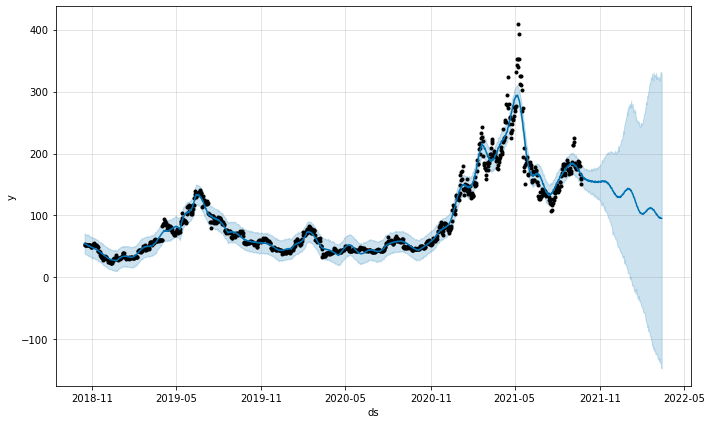

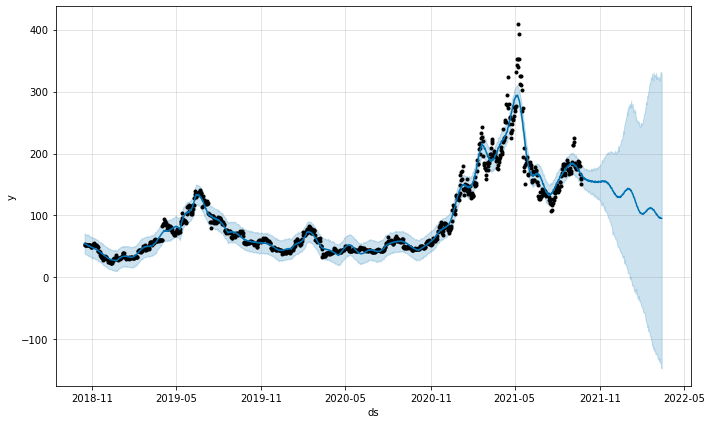

In [25]:
prophet.plot(forecast)

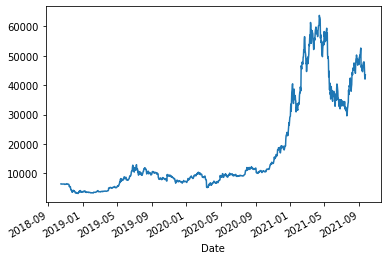

In [ ]:
btc_df['Close'].plot()

###BTC

In [26]:
prophet_df=pd.DataFrame()
prophet_df['y'] = btc_df['Close']
prophet_df['ds'] = btc_df.index
prophet_df.reset_index(drop=True, inplace=True)

In [27]:
prophet_df

,y,ds
0,6444.08,2018-10-16 04:00:00
1,6459.26,2018-10-17 04:00:00
2,6383.39,2018-10-18 04:00:00
3,6383.39,2018-10-19 04:00:00
4,6382.04,2018-10-20 04:00:00
...,...,...
1068,47854.23,2021-09-18 04:00:00
1069,45553.62,2021-09-19 04:00:00
1070,42688.03,2021-09-20 04:00:00
1071,42089.88,2021-09-21 04:00:00


In [28]:
import itertools
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

train,test = prophet_df[:900],prophet_df[900:]

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=None, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2021-03-03 04:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000288C56AACA0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2021-03-03 04:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000288CE40C550>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2

    changepoint_prior_scale  seasonality_prior_scale          rmse
0                     0.001                     0.01  12488.161446
1                     0.001                     0.10  12658.184240
2                     0.001                     1.00  12655.848042
3                     0.001                    10.00  12650.963407
4                     0.010                     0.01   6879.459539
5                     0.010                     0.10   6934.170795
6                     0.010                     1.00   6821.640541
7                     0.010                    10.00   6956.063939
8                     0.100                     0.01   3768.877732
9                     0.100                     0.10   3372.165400
10                    0.100                     1.00   3387.721539
11                    0.100                    10.00   3372.385042
12                    0.500                     0.01   3861.615035
13                    0.500                     0.10   3773.00

In [39]:
prophet = Prophet(changepoint_prior_scale = 0.100, seasonality_prior_scale= 0.10, seasonality_mode='multiplicative')
prophet.fit(prophet_df)



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [40]:
future = prophet.make_future_dataframe(periods=len(prophet_df[900:]))
future.tail()

,ds
1241,2022-03-10 04:00:00
1242,2022-03-11 04:00:00
1243,2022-03-12 04:00:00
1244,2022-03-13 04:00:00
1245,2022-03-14 04:00:00


In [41]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
1239,2022-03-08 04:00:00,4719.415761,4496.933811,4922.843460
1240,2022-03-09 04:00:00,4741.653769,4509.761638,4953.809227
1241,2022-03-10 04:00:00,4731.939827,4523.142735,4952.695334
1242,2022-03-11 04:00:00,4742.324470,4512.011065,4970.463119
1243,2022-03-12 04:00:00,4748.296640,4523.876957,4964.082818
1244,2022-03-13 04:00:00,4762.908842,4540.252379,4987.950646
1245,2022-03-14 04:00:00,4797.369106,4586.840915,5016.352135


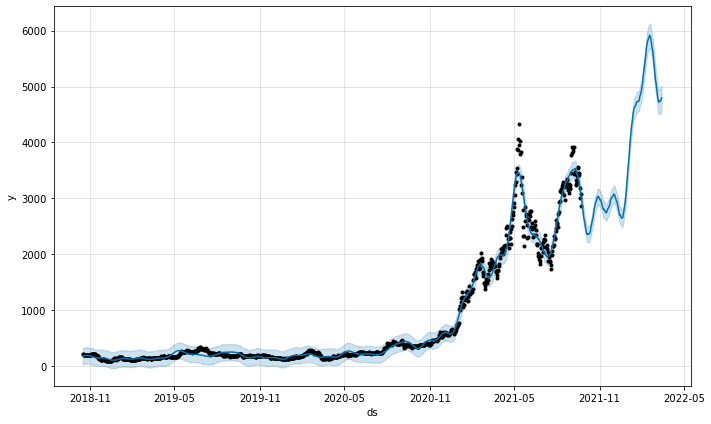

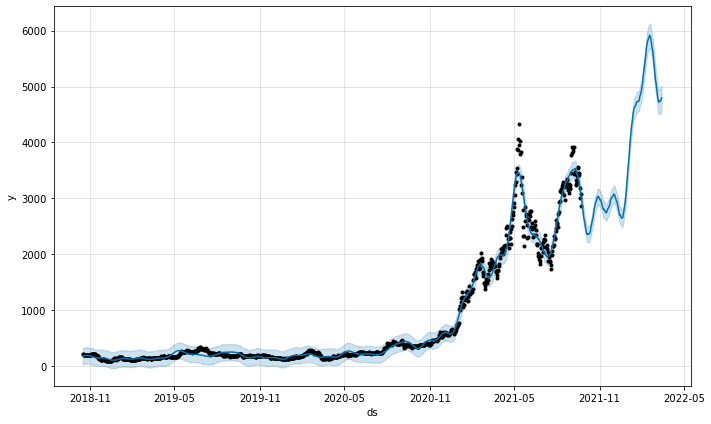

In [42]:
prophet.plot(forecast)

###ETH

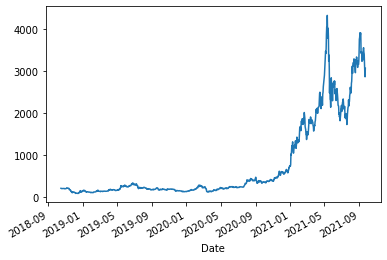

In [ ]:
eth_df['Close'].plot()

In [36]:
prophet_df=pd.DataFrame()
prophet_df['y'] = eth_df['Close']
prophet_df['ds'] = eth_df.index
prophet_df.reset_index(drop=True, inplace=True)

In [37]:
prophet_df

,y,ds
0,205.86,2018-10-16 04:00:00
1,204.60,2018-10-17 04:00:00
2,199.43,2018-10-18 04:00:00
3,199.43,2018-10-19 04:00:00
4,200.73,2018-10-20 04:00:00
...,...,...
1068,3413.18,2021-09-18 04:00:00
1069,3187.56,2021-09-19 04:00:00
1070,2998.29,2021-09-20 04:00:00
1071,2869.31,2021-09-21 04:00:00


In [38]:
import itertools
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

train,test = prophet_df[:900],prophet_df[900:]

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=None, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2021-03-03 04:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000288CE393160>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2021-03-03 04:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000288CD2B69A0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 34 forecasts with cutoffs between 2019-10-25 04:00:00 and 2

    changepoint_prior_scale  seasonality_prior_scale        rmse
0                     0.001                     0.01  450.710438
1                     0.001                     0.10  456.550083
2                     0.001                     1.00  456.788625
3                     0.001                    10.00  456.770932
4                     0.010                     0.01  258.670678
5                     0.010                     0.10  258.952946
6                     0.010                     1.00  258.539821
7                     0.010                    10.00  257.899220
8                     0.100                     0.01  169.007943
9                     0.100                     0.10  156.988321
10                    0.100                     1.00  157.834123
11                    0.100                    10.00  157.864294
12                    0.500                     0.01  154.999093
13                    0.500                     0.10  150.486876
14                    0.5

In [43]:
prophet = Prophet(changepoint_prior_scale = 0.500, seasonality_prior_scale= 0.01, seasonality_mode='multiplicative')
prophet.fit(prophet_df)



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [45]:
future = prophet.make_future_dataframe(periods=len(prophet_df[900:]))
future.tail()

,ds
1241,2022-03-10 04:00:00
1242,2022-03-11 04:00:00
1243,2022-03-12 04:00:00
1244,2022-03-13 04:00:00
1245,2022-03-14 04:00:00


In [46]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\saija\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
1239,2022-03-08 04:00:00,3809.692825,3222.627332,4467.151613
1240,2022-03-09 04:00:00,3832.359260,3188.993689,4483.818488
1241,2022-03-10 04:00:00,3841.479346,3221.898933,4488.698799
1242,2022-03-11 04:00:00,3856.250141,3233.355418,4530.149841
1243,2022-03-12 04:00:00,3862.509038,3231.635530,4530.075485
1244,2022-03-13 04:00:00,3874.981018,3210.435923,4569.227684
1245,2022-03-14 04:00:00,3902.742725,3257.308526,4602.481347


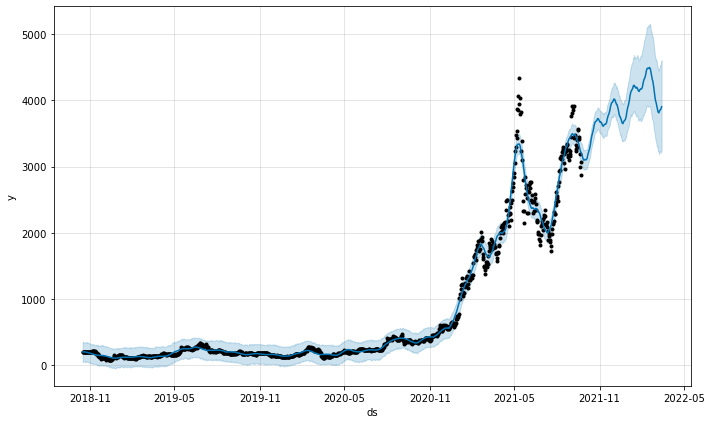

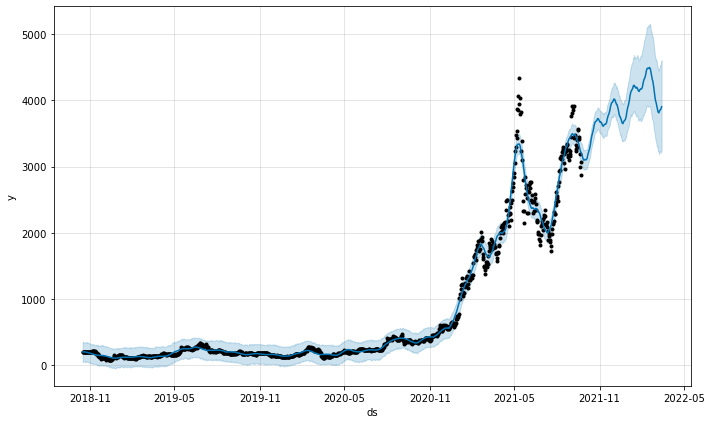

In [47]:
prophet.plot(forecast)

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-10-16 04:00:00,201.892062,53.055295,350.137846,201.892062,201.892062,0.005944,0.005944,0.005944,-0.003001,-0.003001,-0.003001,0.008945,0.008945,0.008945,0.0,0.0,0.0,203.092164
1,2018-10-17 04:00:00,200.344132,63.704495,359.687576,200.344132,200.344132,0.019225,0.019225,0.019225,0.002241,0.002241,0.002241,0.016984,0.016984,0.016984,0.0,0.0,0.0,204.195835
2,2018-10-18 04:00:00,198.796202,57.158241,344.979483,198.796202,198.796202,0.027373,0.027373,0.027373,0.002877,0.002877,0.002877,0.024496,0.024496,0.024496,0.0,0.0,0.0,204.237757
3,2018-10-19 04:00:00,197.248272,57.638985,344.203306,197.248272,197.248272,0.034615,0.034615,0.034615,0.003268,0.003268,0.003268,0.031347,0.031347,0.031347,0.0,0.0,0.0,204.075966
4,2018-10-20 04:00:00,195.700342,54.605302,336.926698,195.700342,195.700342,0.037746,0.037746,0.037746,0.000325,0.000325,0.000325,0.037421,0.037421,0.037421,0.0,0.0,0.0,203.087195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2022-03-10 04:00:00,4458.757867,3221.898933,4488.698799,3783.889630,5218.009800,-0.138442,-0.138442,-0.138442,0.002877,0.002877,0.002877,-0.141319,-0.141319,-0.141319,0.0,0.0,0.0,3841.479346
1242,2022-03-11 04:00:00,4465.706490,3233.355418,4530.149841,3789.457687,5229.563931,-0.136475,-0.136475,-0.136475,0.003268,0.003268,0.003268,-0.139743,-0.139743,-0.139743,0.0,0.0,0.0,3856.250141
1243,2022-03-12 04:00:00,4472.655114,3231.635530,4530.075485,3782.873728,5240.779416,-0.136417,-0.136417,-0.136417,0.000325,0.000325,0.000325,-0.136742,-0.136742,-0.136742,0.0,0.0,0.0,3862.509038
1244,2022-03-13 04:00:00,4479.603737,3210.435923,4569.227684,3783.780005,5254.254656,-0.134972,-0.134972,-0.134972,-0.002541,-0.002541,-0.002541,-0.132431,-0.132431,-0.132431,0.0,0.0,0.0,3874.981018


In [50]:
prophet.params

{'k': array([[-0.38268001]]),
 'm': array([[0.04655957]]),
 'delta': array([[ 1.39044700e-01,  3.05701674e-01,  1.24362383e-02,
          4.12104553e-08, -1.10758061e-05,  9.89781999e-01,
         -9.70357356e-01, -9.86016279e-01,  8.20091172e-01,
          1.15910698e-06, -1.45318750e-02,  2.29146736e-08,
          6.26507061e-01, -7.62991976e-01, -8.46890418e-06,
          3.36867851e-01,  6.18382305e-01, -3.85104472e-06,
         -7.56013182e-01,  5.93008115e-07,  4.63150117e-01,
          5.56994360e-01,  3.39584829e+00,  4.72474557e-07,
         -2.67435184e+00]]),
 'sigma_obs': array([[0.02621989]]),
 'beta': array([[ 0.02476644,  0.01264058, -0.06658055, -0.05302741,  0.03966992,
          0.10818824,  0.01831562, -0.09666454, -0.00603333, -0.00203466,
          0.00349368,  0.02715167,  0.00306186, -0.03563905, -0.01885431,
          0.00834257,  0.041357  ,  0.01522892,  0.01236779, -0.00439104,
          0.00173309,  0.00322122, -0.00021258,  0.00021536, -0.00070483,
        